# Code for generating a basic "death prediction" model using MIMIC-2 Data

Handle Imports

In [1]:
import pickle
import seaborn
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neural_network import MLPClassifier

import sys
sys.path.append('../')
from helpers import *
sys.path.append('../../../')
from explainer.single_variable_explainer import *

Load in Data

In [2]:
df = pd.read_csv('../../datasets/mimic-ii/full_cohort_data.csv')

We shall make our goal to predict "Death" (as measured by 'day_28_flg'). To accurately test our methodology we shall build a 'black box' MLP classifier that uses a range of variables to make the predictions. We shall then only use "changeable" variables to act in our prediction.

We begin by "Under Sampling" our data to ensure our accuracy figures are interpretable.

In [3]:
rus = RandomUnderSampler(random_state=0)
under_sampled = rus.fit_resample(df, df.day_28_flg)[0]

We then use our make model helper function to make a "two variable model" that uses the two most important variables.

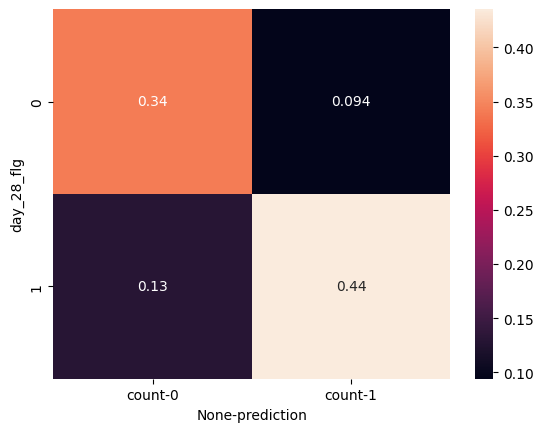

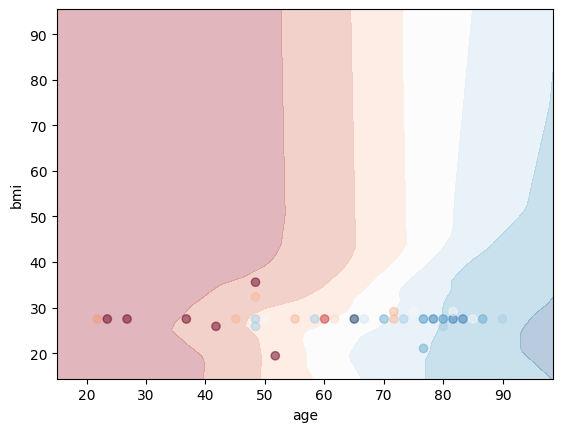

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000))])

In [4]:
make_model(
    under_sampled,
    MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000),
    'day_28_flg',
    ['age', 'bmi'],
    plot_heatmap=True,
    plot_decision_boundary=True,
    pre_processing={
        'bmi': 'fill_with_mean'
    }
)

Similarly, we now train a model that also includes 'weight' as a feature

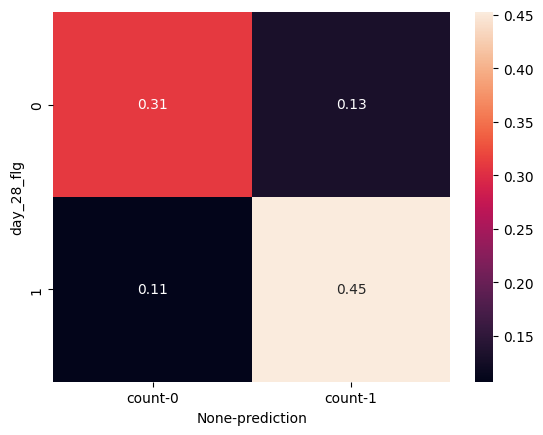

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000))])

In [5]:
make_model(
    under_sampled,
    MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000),
    'day_28_flg',
    ['age', 'bmi', 'weight_first'],
    plot_heatmap=True,
    pre_processing={
        'bmi': 'fill_with_mean'
    }
)

Finally, we train a model that includes many numerical features

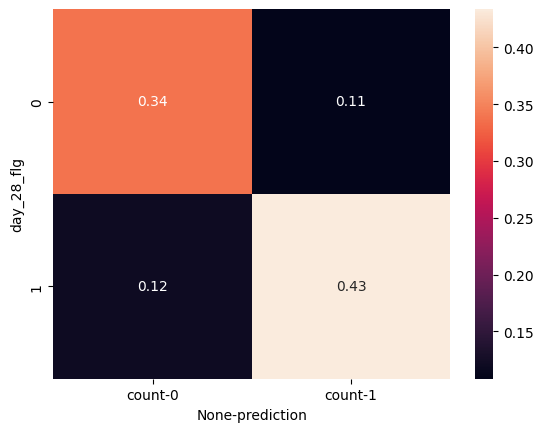

In [6]:
model, train_X = make_model(
    under_sampled,
    MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000),
    'day_28_flg',
    [
        "age",
        "bmi",
        "weight_first",
        "icu_los_day",
        "hospital_los_day",
        "day_icu_intime_num",
        "hour_icu_intime",
        "map_1st",
        "hr_1st",
        "temp_1st",
        "spo2_1st",
        "abg_count",
        "wbc_first",
        "hgb_first",
        "platelet_first",
        "sodium_first",
        "potassium_first",
        "tco2_first",
        "chloride_first",
        "bun_first",
        "creatinine_first",
    ],
    plot_heatmap=True,
    pre_processing={
        'bmi': 'fill_with_mean'
    },
    return_training_set=True
)

In [7]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('train_X.pkl', 'wb') as f:
    pickle.dump(train_X, f)
